In [1]:
import numpy as np
import pandas  as pd
import matplotlib.pyplot as plt

In [2]:
%matplotlib notebook

In [75]:
r_band = pd.read_csv('/Users/adamamiller/software/aam_python/sn_companion_collision/sn_collision/filter_data/ZTF/P48_r.dat', 
                          delim_whitespace=True, skiprows=1,
                          header=None, names = ['wavelength', 'transmission']
                          )

In [76]:
spec1_df = pd.read_csv('./spec/SN2011fe_2011-08-26_00-00-00_UH88_SNIFS_None.dat',
                       comment='#', delim_whitespace=True, header=None, 
                       names = ['wave', 'flux'])
wv1, fl1 = plot_box_spec(spec1_df.wave.values, spec1_df.flux.values)
norm1 = np.median(fl1[np.where((wv1 > 7200) & (wv1 < 7400))])


spec2_df = pd.read_csv('./spec/SN2011fe_2011-08-27_05-55-38_UH88_SNIFS_SNfactory.dat',
                       comment='#', delim_whitespace=True, header=None, 
                       names = ['wave', 'flux', 'variance'])
wv2, fl2 = plot_box_spec(spec2_df.wave.values, spec2_df.flux.values)
norm2 = np.median(fl2[np.where((wv2 > 7200) & (wv2 < 7400))])

spec3_df = pd.read_csv('./spec/SN2011fe_2011-08-28_05-56-36_UH88_SNIFS_SNfactory.dat',
                       comment='#', delim_whitespace=True, header=None, 
                       names = ['wave', 'flux', 'variance'])
wv3, fl3 = plot_box_spec(spec3_df.wave.values, spec3_df.flux.values)
norm3 = np.median(fl3[np.where((wv3 > 7200) & (wv3 < 7400))])

In [77]:
def plot_box_spec(wave, flux): 
    flux_plot = np.repeat(flux, 2)
    wv_plot = wave.copy()
    wv_plot[:-1] += np.diff(wave)/2
    wv_plot = np.append(wave[0]-(wave[1]-wave[0])/2, 
                        np.append(np.repeat(wv_plot[0:-1], 2), 
                                  wave[-1]+(wave[-1]-wave[-2])/2))
    
    return wv_plot, flux_plot

<IPython.core.display.Javascript object>


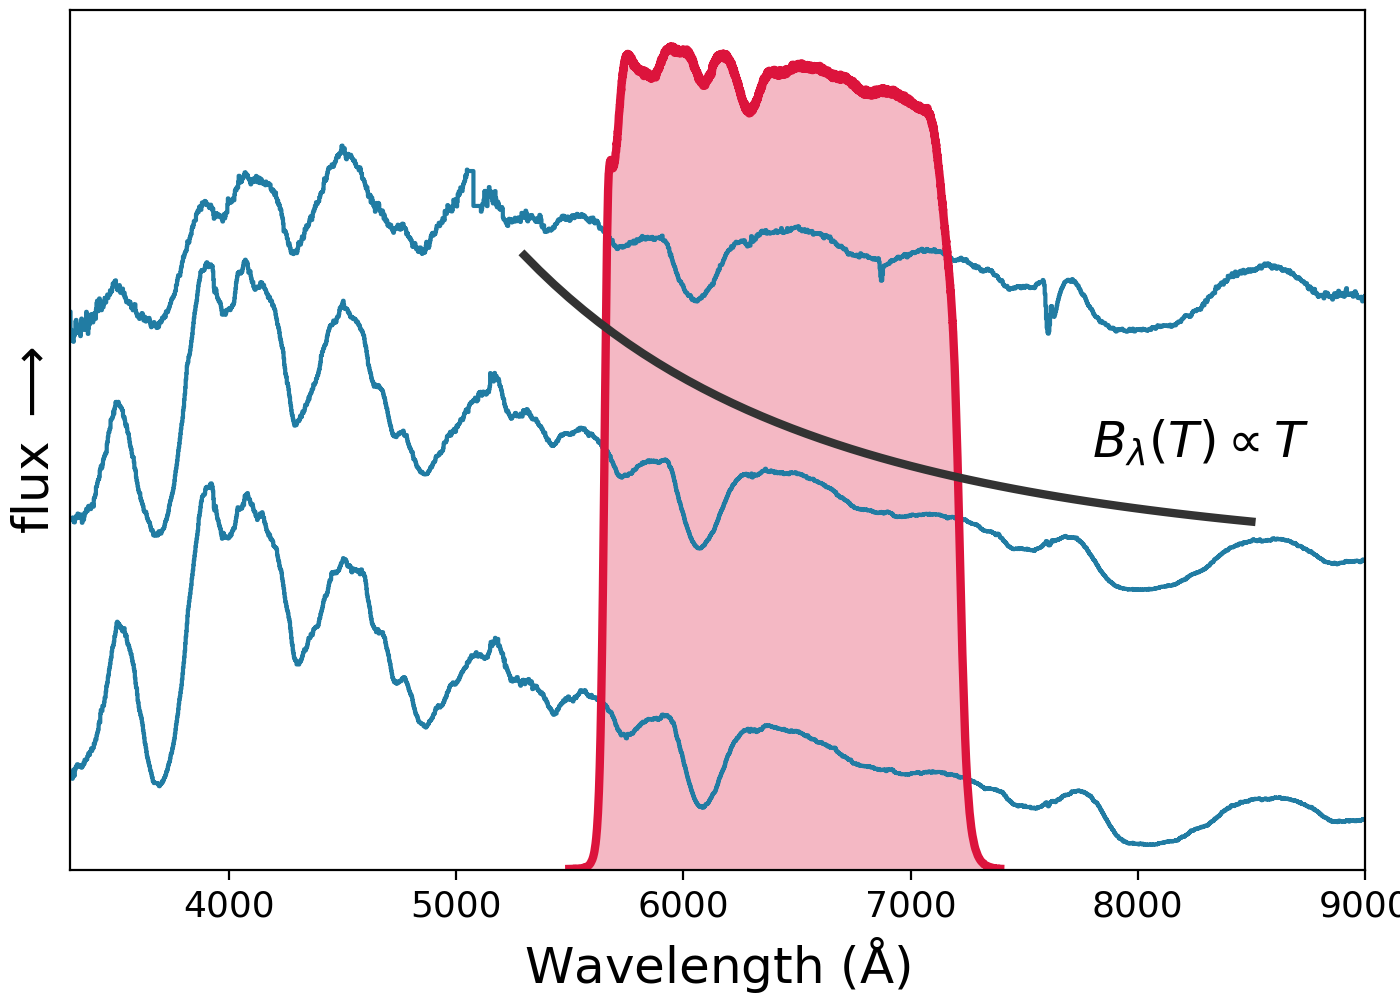

In [105]:
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(wv1, fl1/norm1, color="#217CA3")
ax.plot(wv2, fl2/norm2-3, color="#217CA3")
ax.plot(wv3, fl3/norm3-6, color="#217CA3")

ax.plot(r_band.wavelength.values, r_band.transmission.values*11-6,
        'Crimson', lw=3)
ax.fill(r_band.wavelength.values, r_band.transmission.values*11-6,
        'Crimson', alpha=0.3)

wv_grid = np.linspace(5300, 8500)
b_flux = 10000/wv_grid**4
b_norm = np.median(b_flux[np.where((wv_grid > 7200) & (wv_grid < 7400))])

ax.plot(wv_grid, b_flux/b_norm - 2.5, '0.2', lw=3)
ax.text(7800, -1.2, r'$B_\lambda(T) \propto T$', fontsize=18)

ax.set_ylim(-6,4)
ax.set_xlim(3300,9000)
ax.set_yticks([])
ax.set_xlabel("$\mathrm{Wavelength}$ ($\\rm{\\AA}$)",  fontsize=18)
ax.set_ylabel("$\mathrm{flux} \; \longrightarrow$",  fontsize=18)
ax.tick_params(labelsize=13)

fig.subplots_adjust(left=0.05,right=0.975,top=0.99,bottom=0.13)